## Deep Unfolding applied to gradient descent
using: \
Julia 1.8.2 \
Flux.jl 0.13.6 \
Zygote.jl 0.6.49 \
\
In this file, I explore the application of Deep Unfolding to gradient descen algorithms. It is based on the jupyter notebooks of Wadayama found in https://github.com/wadayama/DU-Book/tree/main/Chapter_3 .

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

In [2]:
#f(x)=(1-x[1])^2+100*(x[2]-x[1]^2)^2
f(x) = x[1]^2+x[2]^2


f (generic function with 1 method)

In [3]:
function GD_ki(max_itr, x0, eta)
    x = x0
    for i in 1:max_itr
        #df = gradient(() -> f(x), Flux.params(x))
        df = 2*x
        x = x - eta[1].*df
    end
    return f(x)
end

GD_ki (generic function with 1 method)

In [4]:
function train_ki(opt, eta, max_itr, train_itr)
    ps = Flux.params(eta) 
    l = []
    for i in 1:train_itr
        push!(l,eta[1]) #like append in python
        gs = Flux.gradient(ps) do
            GD_ki(max_itr, randn(2), eta)
        end
        Flux.Optimise.update!(opt, ps, gs)    
    end  
    return l
end

train_ki (generic function with 1 method)

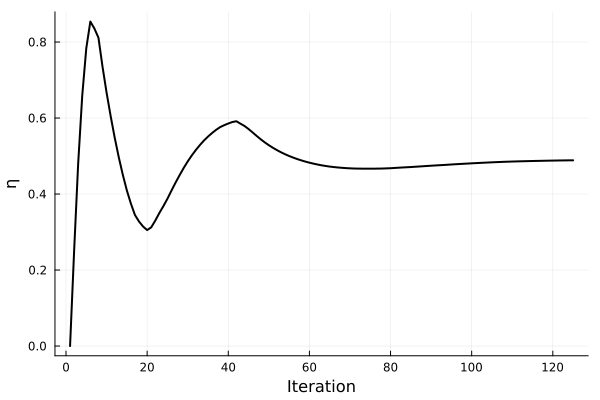

In [5]:
opt = Flux.ADAM(0.25) 
eta = [0.0]
train_itr = 125
l = train_ki(opt, eta, 2, train_itr)
plot(1:train_itr,l, xlabel="Iteration", ylabel="η",legend=false, lw=2,color=:black)